# Student Performance Prediction Model

#### In this project, the goal is to develop a predictive model that can estimate student performance based on various demographic, social, and educational features. The datasets used in this project, 'student-mat.csv' and 'student-por.csv,' contain information on student performance in two different subjects: Math and Portuguese. These datasets come from a study conducted in Portuguese schools and include variables such as study time, family background, and extracurricular activities, which are believed to influence students' final grades.

#### The core focus is to apply machine learning techniques to predict the final scores of students in Math and Portuguese, while exploring how different features impact these predictions. This will help provide insights into the key factors that influence academic success, which may be valuable for educators and policymakers aiming to improve student outcomes.

The dataset used is: https://archive.ics.uci.edu/dataset/320/student+performance


# Data Dictionary

## Features
* school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

* sex - student's sex (binary: 'F' - female or 'M' - male)

* age - student's age (numeric: from 15 to 22)

* address - student's home address type (binary: 'U' - urban or 'R' - rural)

* famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

* Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

* Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)

* Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)

* Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

* Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

* reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')

* gaurdian- student's guardian (nominal: 'mother', 'father' or 'other')

* traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

* studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

* failures - number of past class failures (numeric: n if 1<=n<3, else 4)	

* schoolup - extra educational support (binary: yes or no)

* famsup - family educational support (binary: yes or no)

* paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

* activities - extra-curricular activities (binary: yes or no)

* nursery      -attended nursery school (binary: yes or no)

* higher - wants to take higher education (binary: yes or no)

* internet - Internet access at home (binary: yes or no)

* romantic - with a romantic relationship (binary: yes or no)

* famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

* freetime - free time after college (numeric: from 1 - very low to 5 - very high)

* goout - going out with friends (numeric: from 1 - very low to 5 - very high)

* Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

* Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

* health - current health status (numeric: from 1 - very bad to 5 - very good)

* absences - number of absences (numeric: from 0 to 93)

## Grades

* G1 - first period grade (numeric: from 0 to 20)

* G2 - second period grade (numeric: from 0 to 20)

* G3 - final grade (numeric: from 0 to 20, output target)

## Import Necessary Libraries

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


## Load Dataset

In [2]:
# Load the dataset 
data_mat = pd.read_csv('student-mat.csv')  
data_mat.head()

,school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0,"GP;""F"";18;""U"";""GT3"";""A"";4;4;""at_home"";""teacher..."
1,"GP;""F"";17;""U"";""GT3"";""T"";1;1;""at_home"";""other"";..."
2,"GP;""F"";15;""U"";""LE3"";""T"";1;1;""at_home"";""other"";..."
3,"GP;""F"";15;""U"";""GT3"";""T"";4;2;""health"";""services..."
4,"GP;""F"";16;""U"";""GT3"";""T"";3;3;""other"";""other"";""h..."


In [3]:
# Load the CSV file with semicolon as the delimiter and double quotes handled
data_mat = pd.read_csv('student-mat.csv', sep=';', quotechar='"')

# Display the first few rows
print(data_mat.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [4]:
data_por = pd.read_csv('student-por.csv')  
data_por.head()

,school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0,"GP;""F"";18;""U"";""GT3"";""A"";4;4;""at_home"";""teacher..."
1,"GP;""F"";17;""U"";""GT3"";""T"";1;1;""at_home"";""other"";..."
2,"GP;""F"";15;""U"";""LE3"";""T"";1;1;""at_home"";""other"";..."
3,"GP;""F"";15;""U"";""GT3"";""T"";4;2;""health"";""services..."
4,"GP;""F"";16;""U"";""GT3"";""T"";3;3;""other"";""other"";""h..."


In [5]:
# Load the CSV file with semicolon as the delimiter and double quotes handled
data_por = pd.read_csv('student-por.csv', sep=';', quotechar='"')

# Display the first few rows
print(data_por.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  
3      3        2      2     1     1      5        0  14  14  14  
4      4        3      2     1     2      5        0  11  13  13  

[5 rows x 33 columns]


## Data Preprocessing And Cleaning

In [6]:
data_mat.duplicated().sum()

0

In [7]:
data_por.duplicated().sum()

0

In [8]:
data_mat.shape

(395, 33)

In [9]:
data_por.shape

(649, 33)

### There are no duplicate values

In [10]:
data_mat.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [11]:
data_por.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

### There are no missing values.

In [12]:
data_por['subject']='Portugese'
data_mat['subject']='Maths'

In [13]:
data=pd.concat([data_por, data_mat], axis=0) #combining two data files

In [14]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'subject'],
      dtype='object')

### The two datasets are combined and new column 'subject' is introduced.

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 394
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher   

In [16]:
# Summary statistics for numerical columns
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [17]:
# Overview of non-numeric columns
data.describe(include='object')

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,subject
count,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,no,yes,yes,yes,no,Portugese
freq,772,591,759,738,923,399,584,430,728,925,640,824,528,835,955,827,673,649


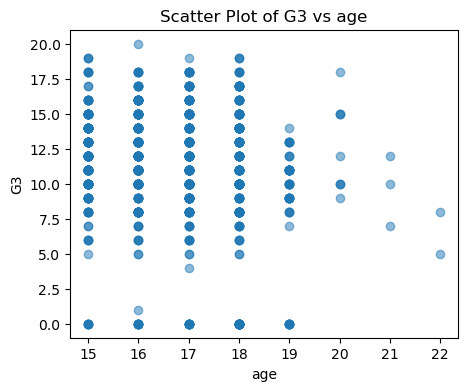

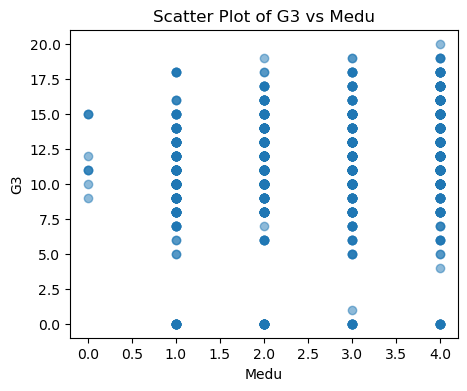

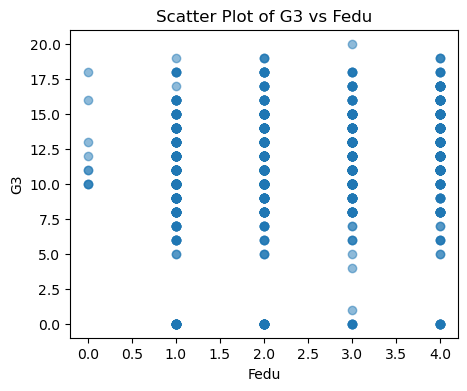

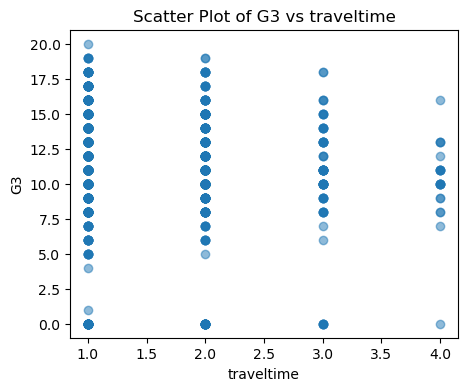

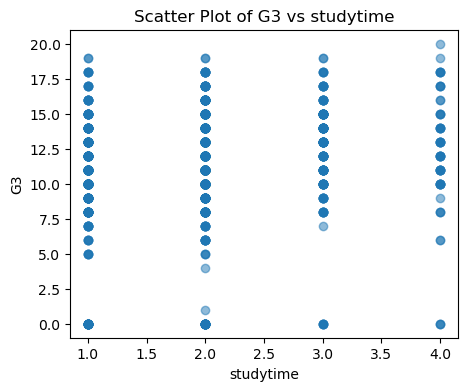

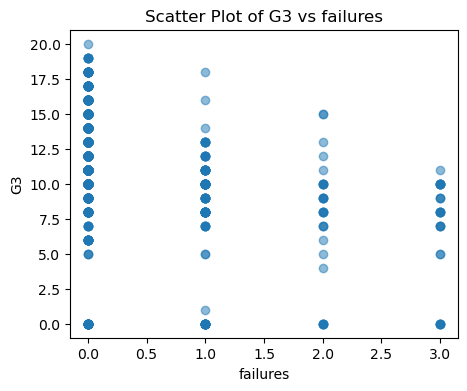

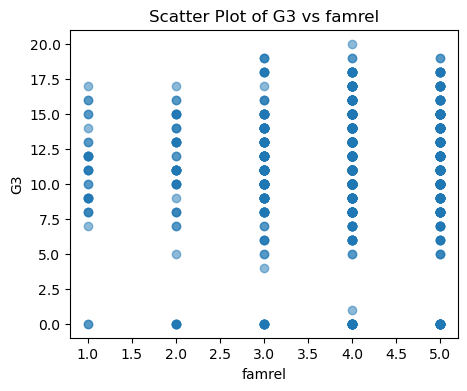

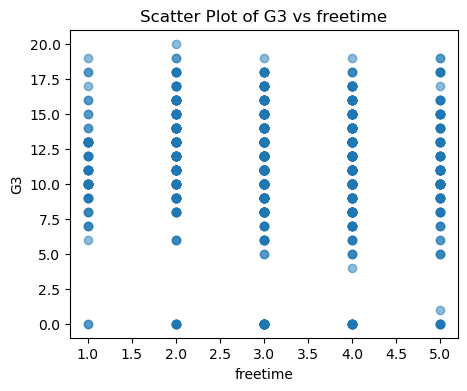

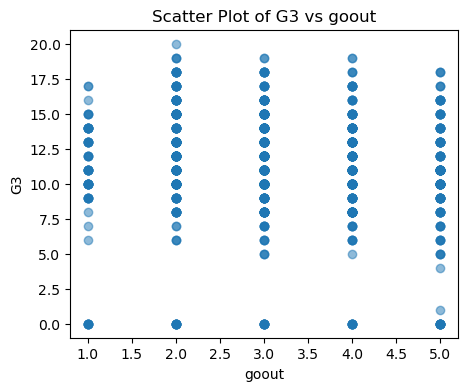

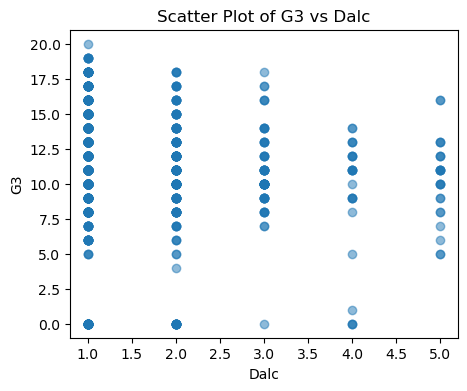

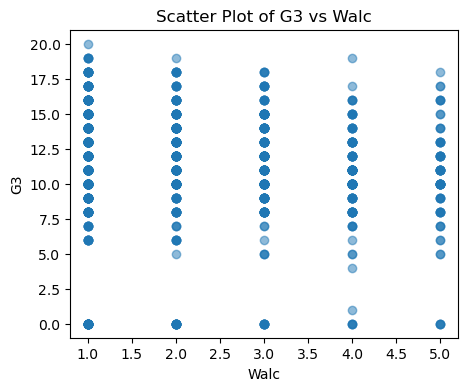

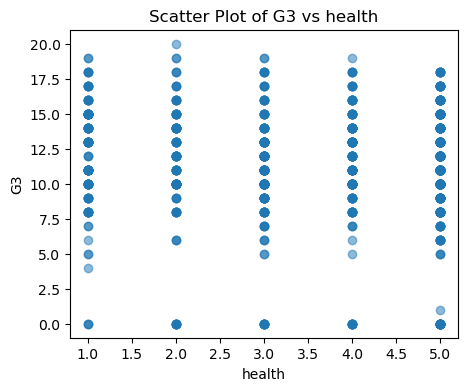

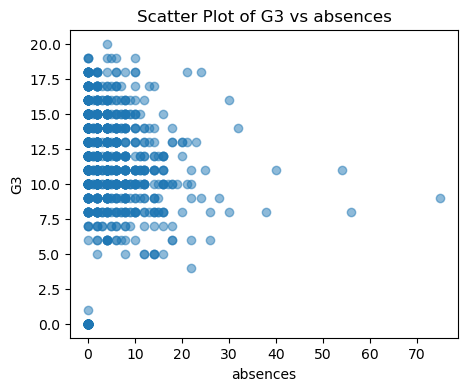

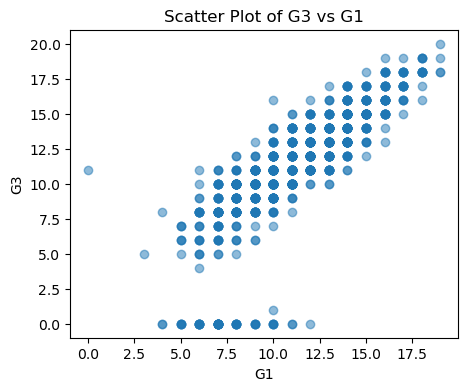

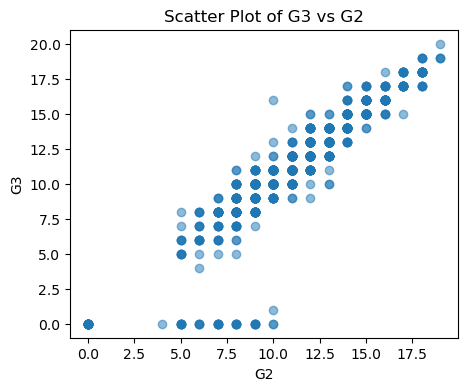

In [67]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Plot scatter plots of 'G3' against each numerical column
for col in numerical_columns:
    if col != 'G3':  # Skip the target variable itself
        plt.figure(figsize=(5, 4))
        plt.scatter(data[col], data['G3'], alpha=0.5)
        plt.title(f'Scatter Plot of G3 vs {col}')
        plt.xlabel(col)
        plt.ylabel('G3')
        plt.show()

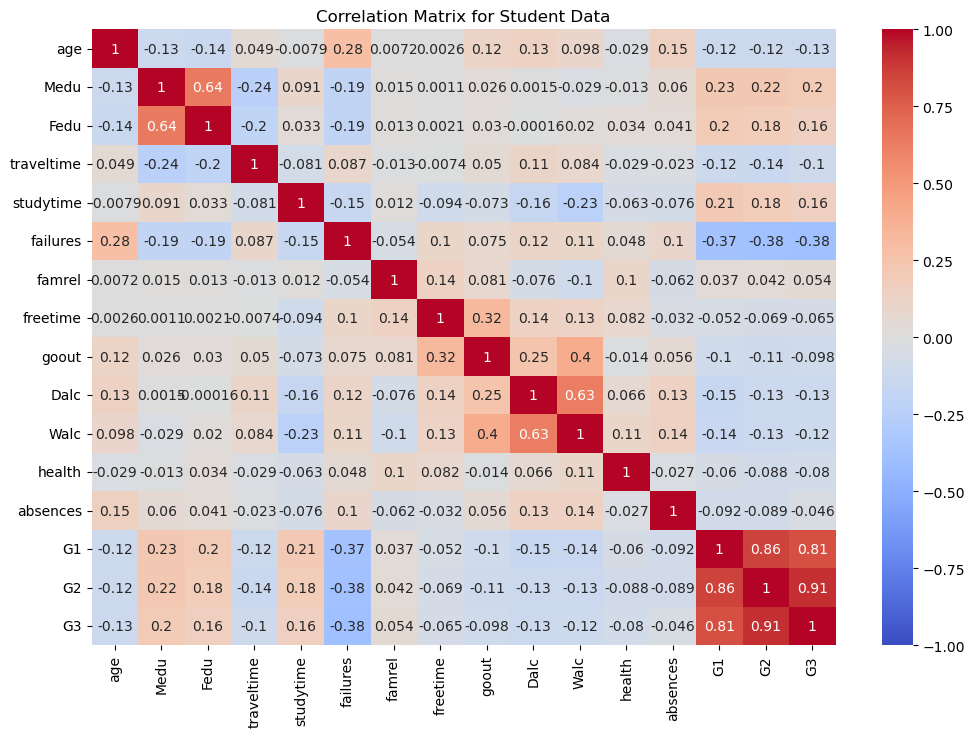

In [19]:
# Correlation matrix
import seaborn as sns
plt.figure(figsize=(12, 8))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Student Data')
plt.show()


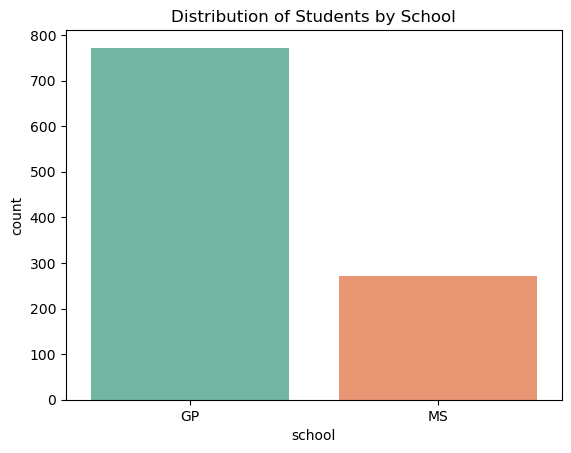

In [20]:
sns.countplot(x='school', data=data, palette='Set2')
plt.title('Distribution of Students by School')
plt.show()

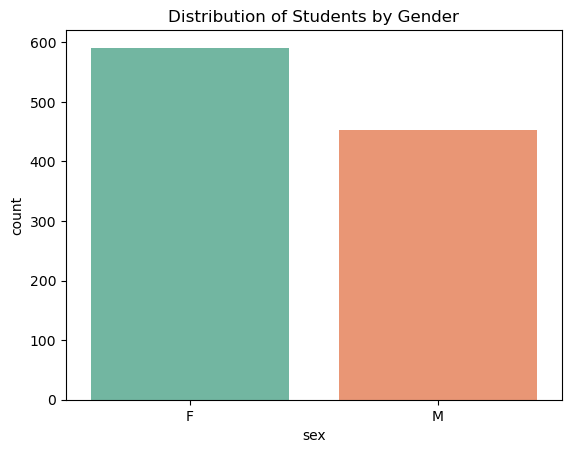

In [21]:
sns.countplot(x='sex', data=data, palette='Set2')
plt.title('Distribution of Students by Gender')
plt.show()

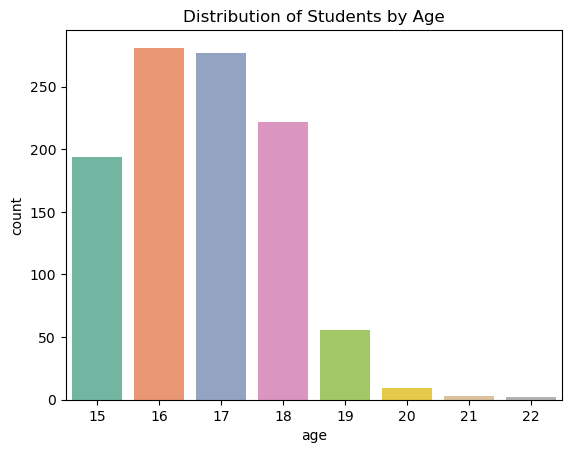

In [22]:
sns.countplot(x='age', data=data, palette='Set2')
plt.title('Distribution of Students by Age')
plt.show()

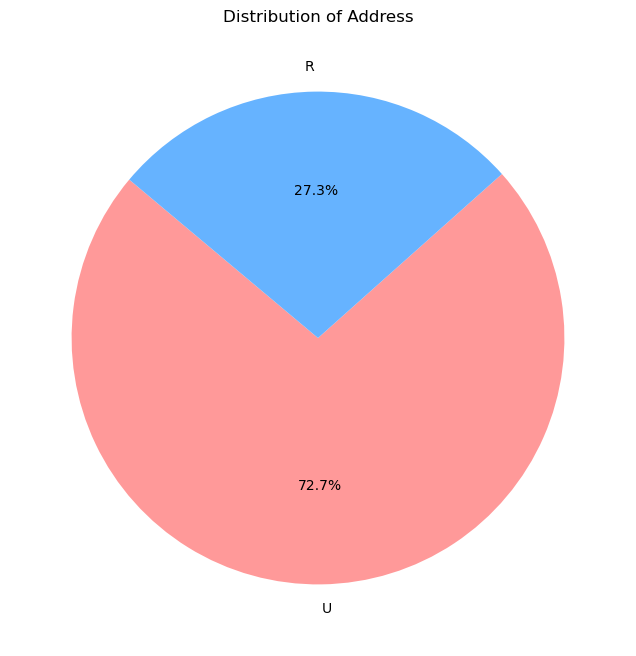

In [23]:
# Calculate the distribution of family sizes
address_distribution = data['address'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(address_distribution, labels=address_distribution.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Distribution of Address')
plt.show()

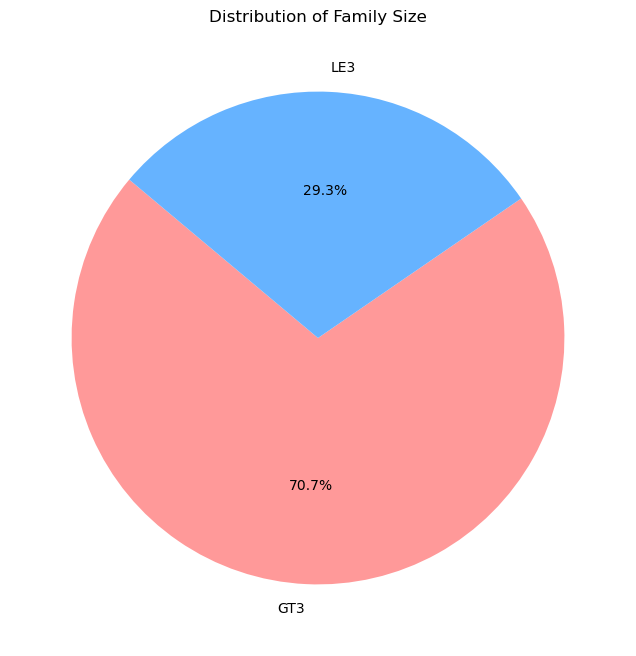

In [24]:
# Calculate the distribution of family sizes
famsize_distribution = data['famsize'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(famsize_distribution, labels=famsize_distribution.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Distribution of Family Size')
plt.show()

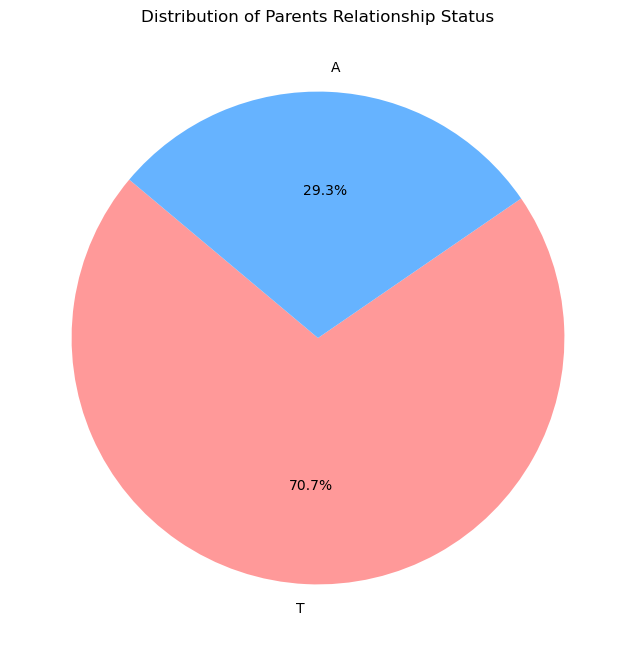

In [25]:
# Calculate the distribution of family sizes
Pstatus_distribution = data['Pstatus'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(famsize_distribution, labels=Pstatus_distribution.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Distribution of Parents Relationship Status')
plt.show()

###  Investigate how categorical variables impact the final grade.

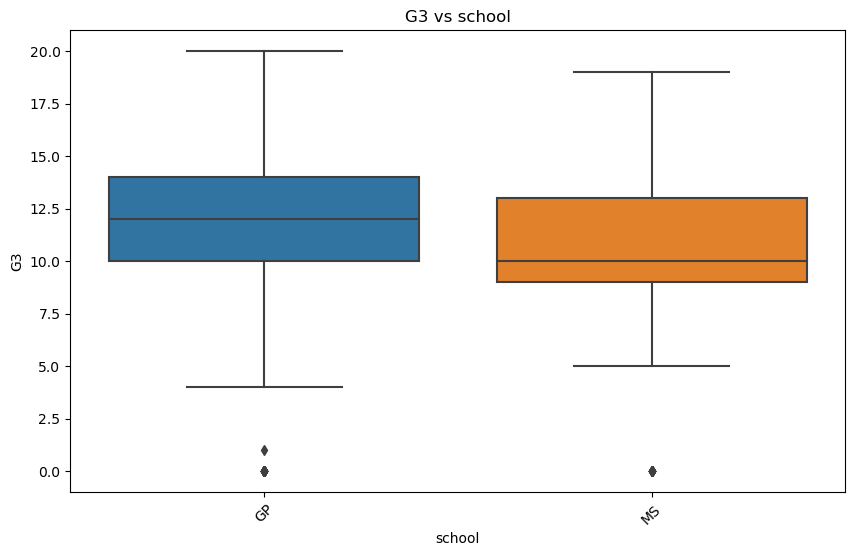

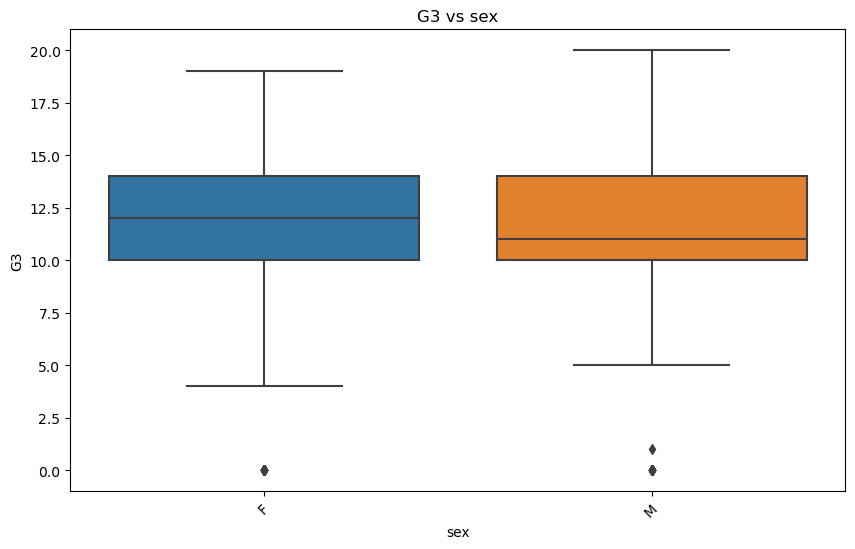

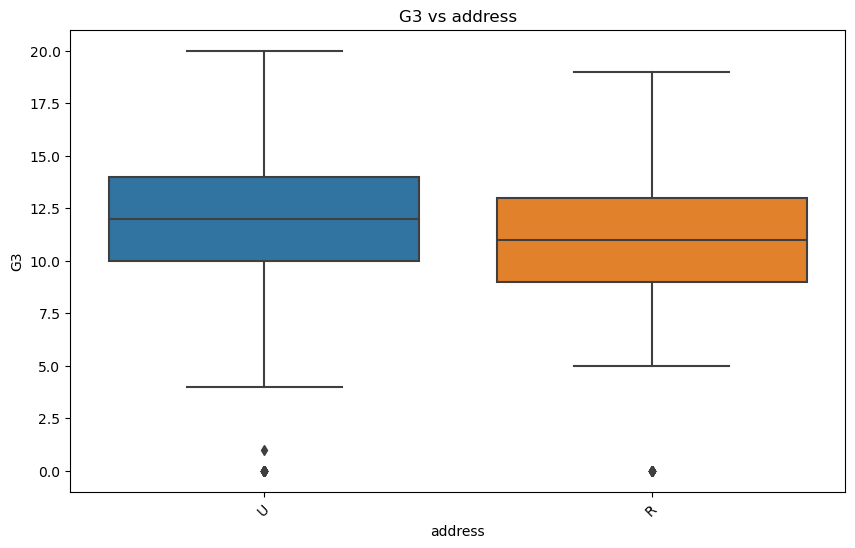

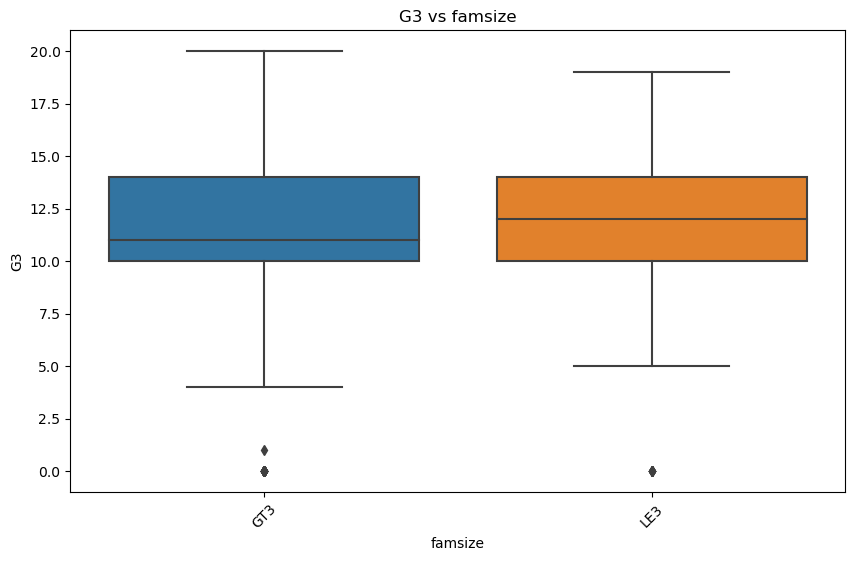

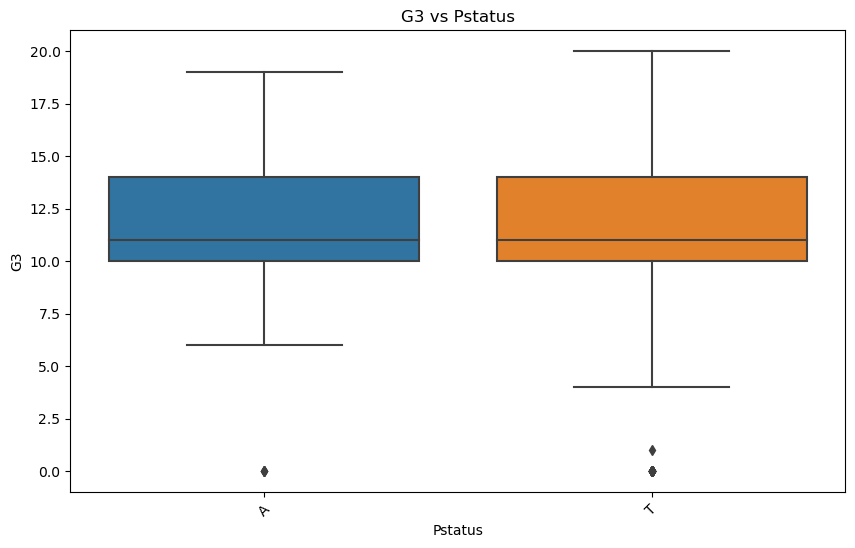

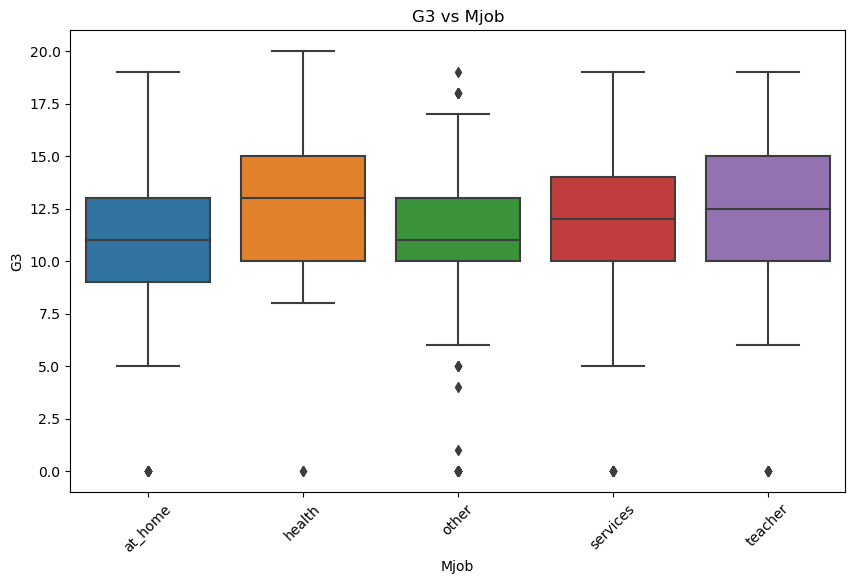

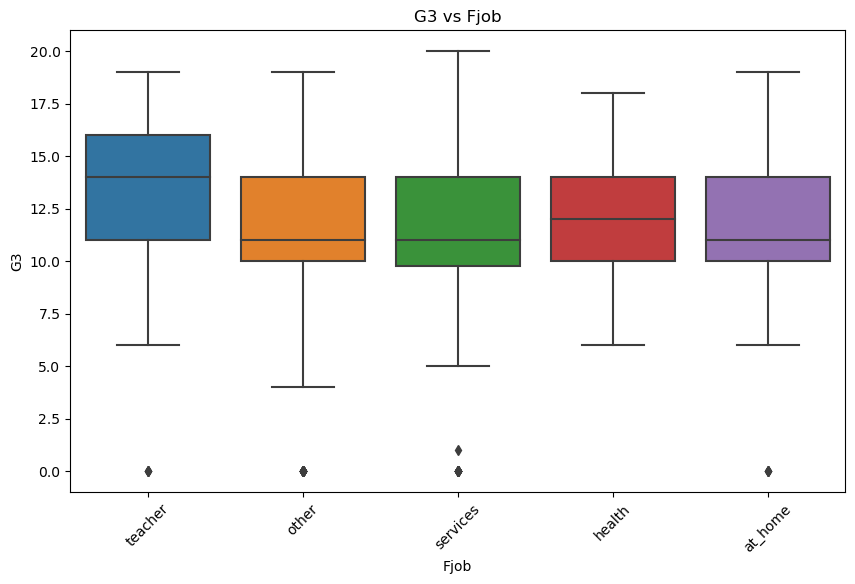

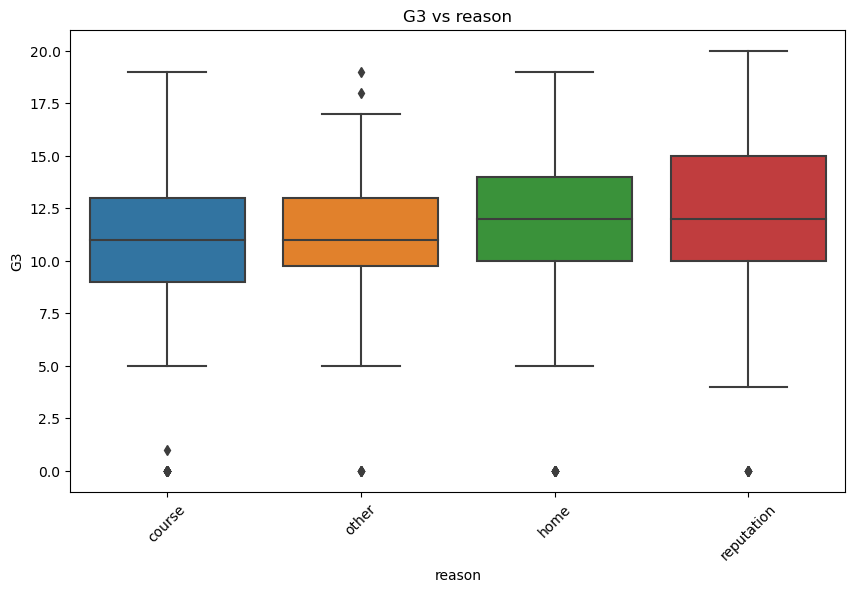

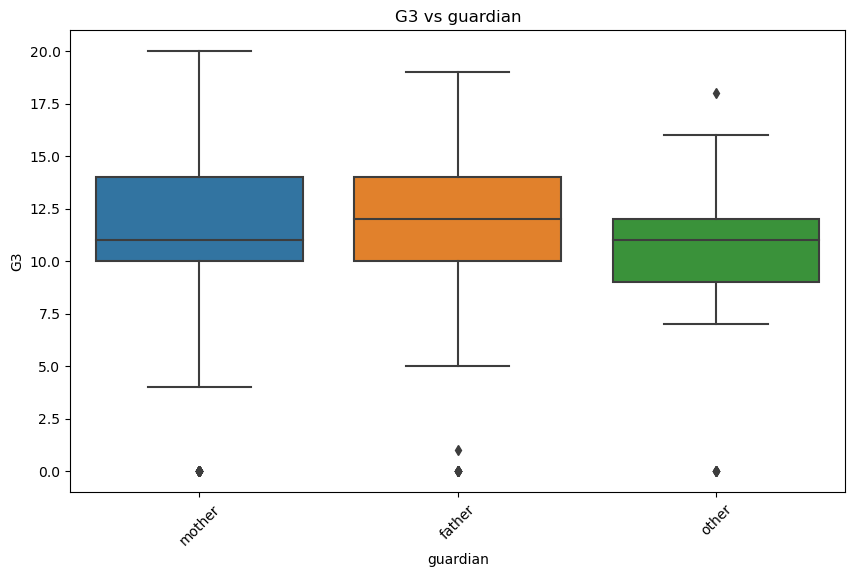

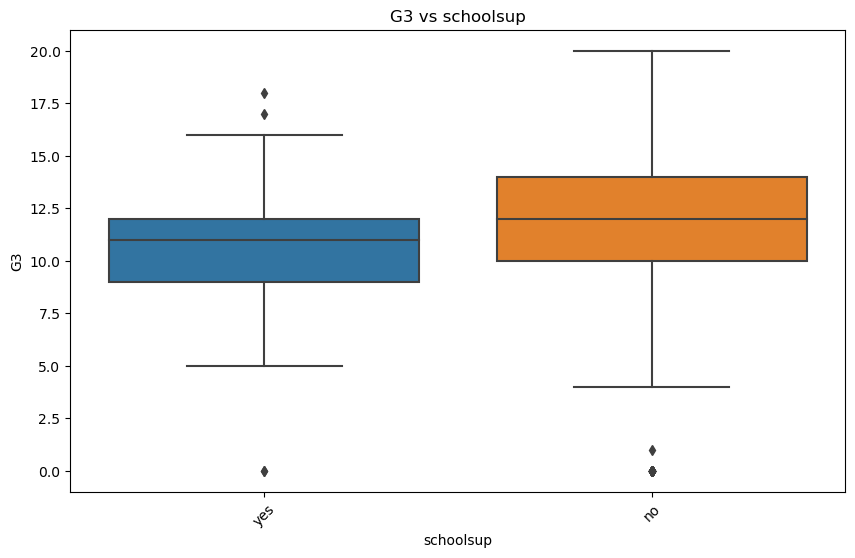

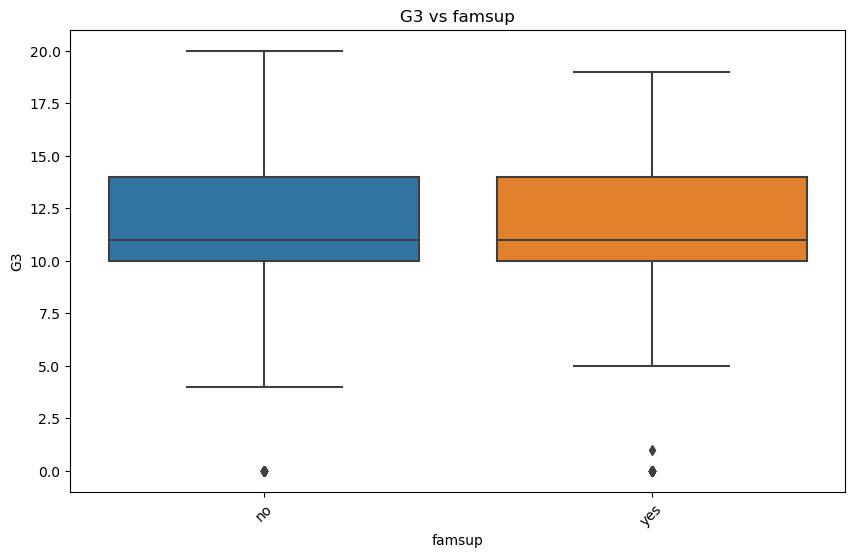

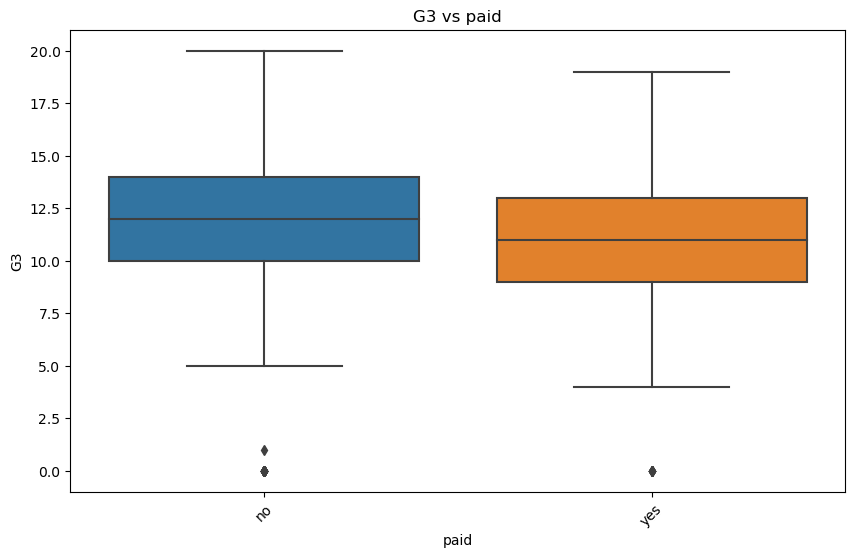

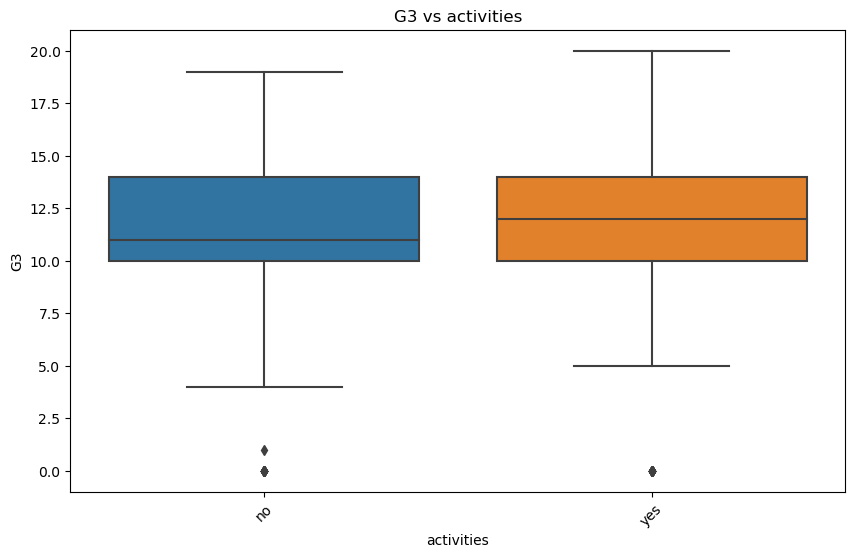

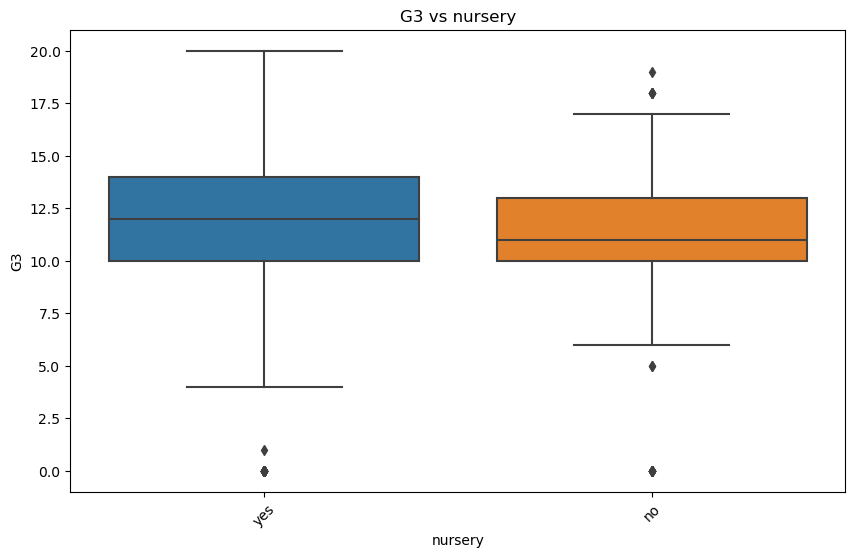

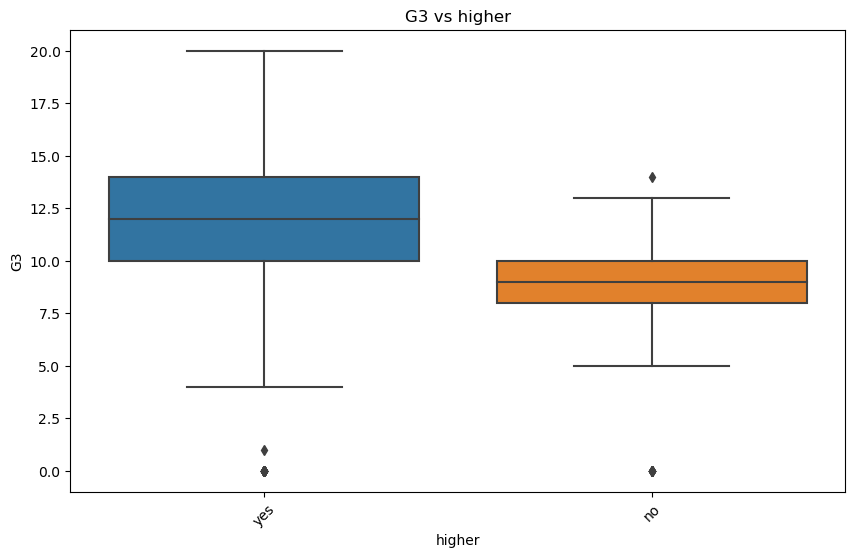

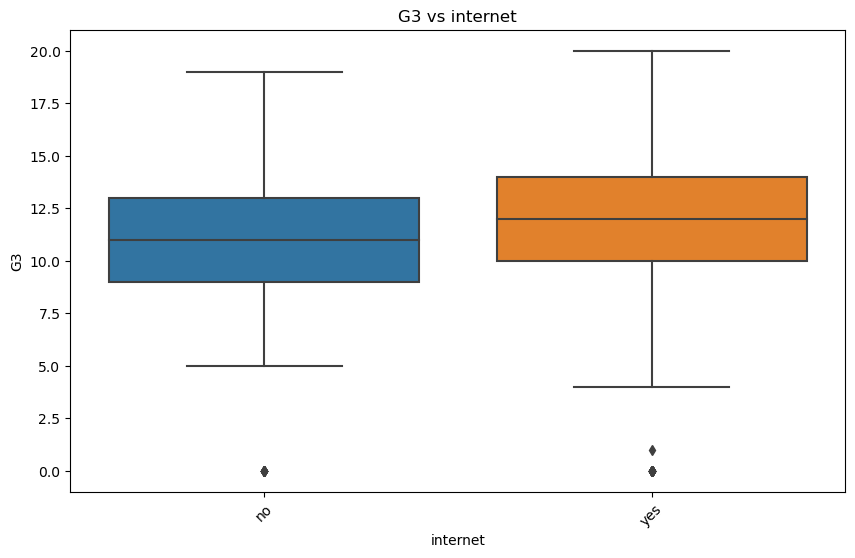

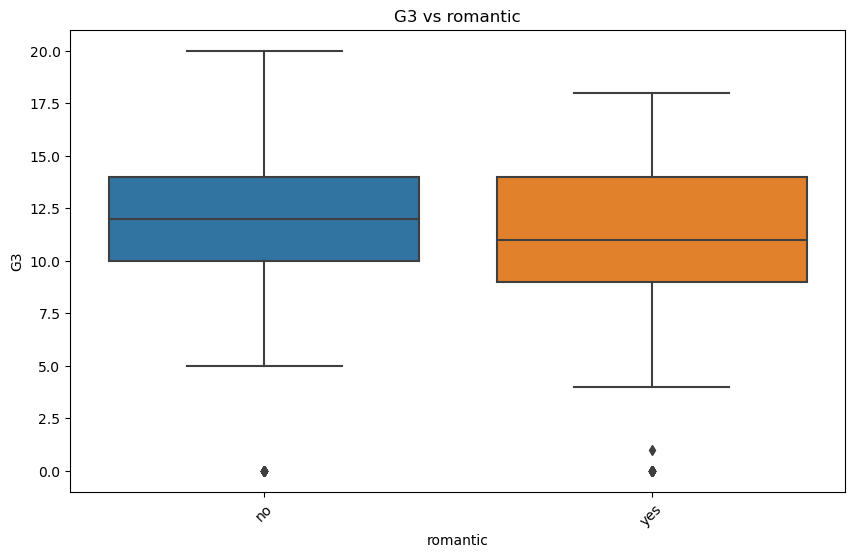

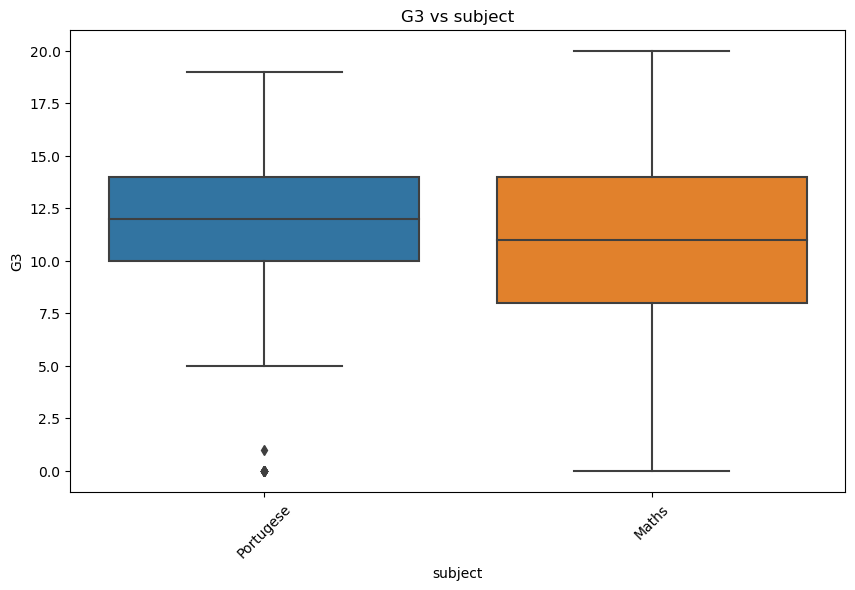

In [26]:
# Extract names of categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Plot each box plot individually
for column in categorical_columns:
    plt.figure(figsize=(10, 6))  # Adjust the figure size for individual plots
    sns.boxplot(x=column, y='G3', data=data)
    plt.title(f'G3 vs {column}')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
categorical_columns

In [27]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Display numerical columns
print("Numerical columns:", numerical_columns)

Numerical columns: Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')


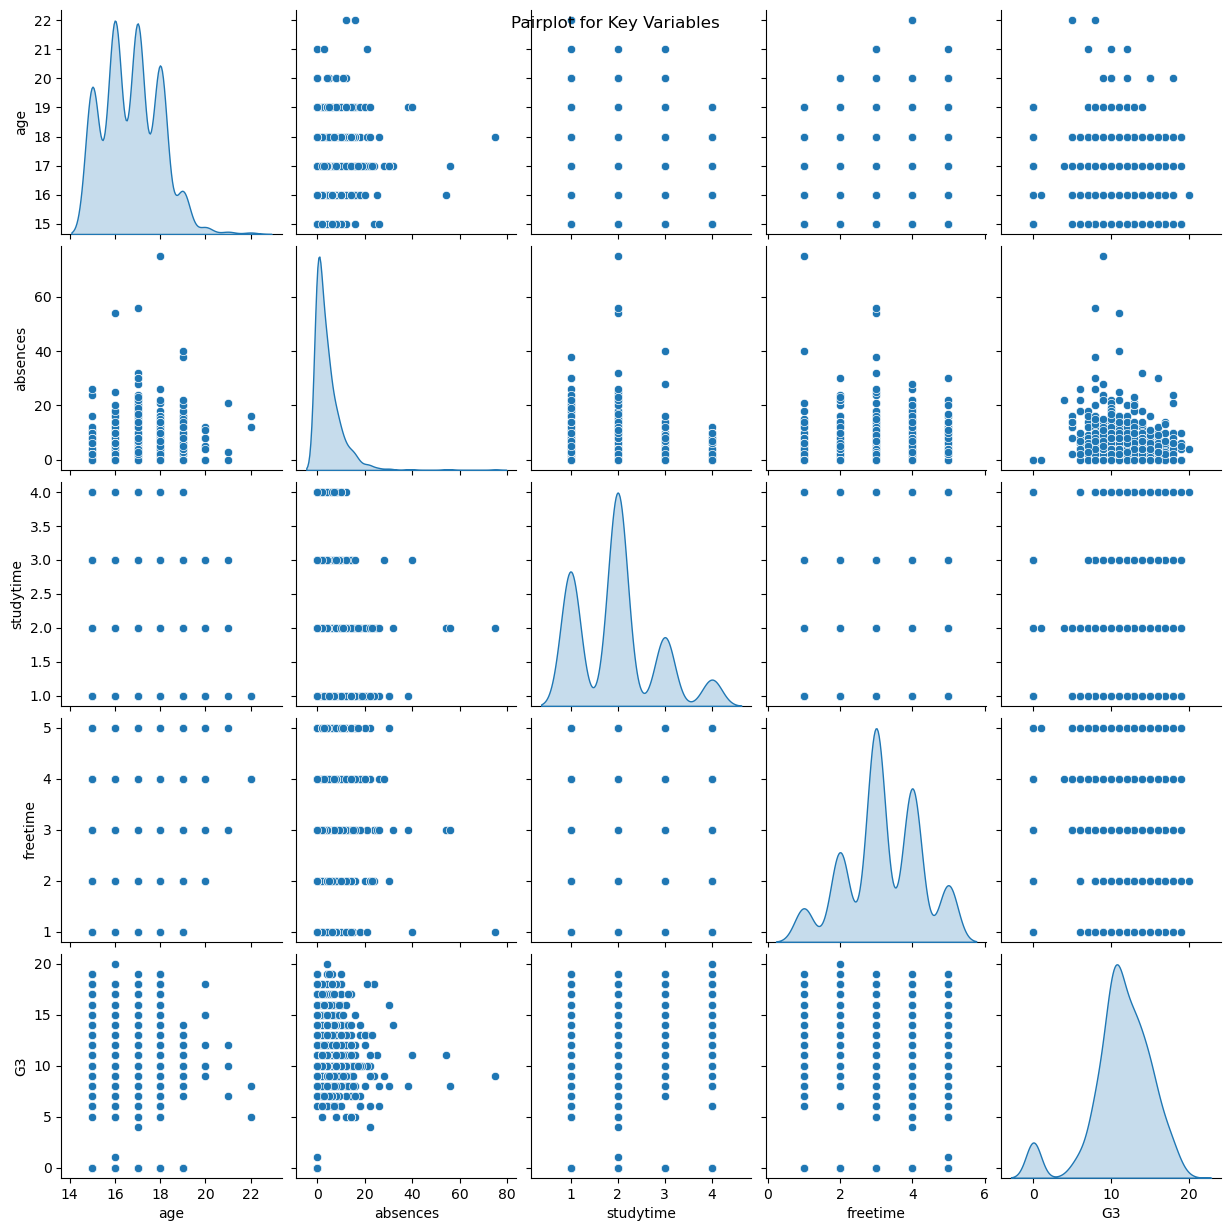

In [28]:
# Reset the index to default integer index
data.reset_index(drop=True, inplace=True)

sns.pairplot(data[['age', 'absences', 'studytime', 'freetime', 'G3']], diag_kind='kde')
plt.suptitle('Pairplot for Key Variables')
plt.show()

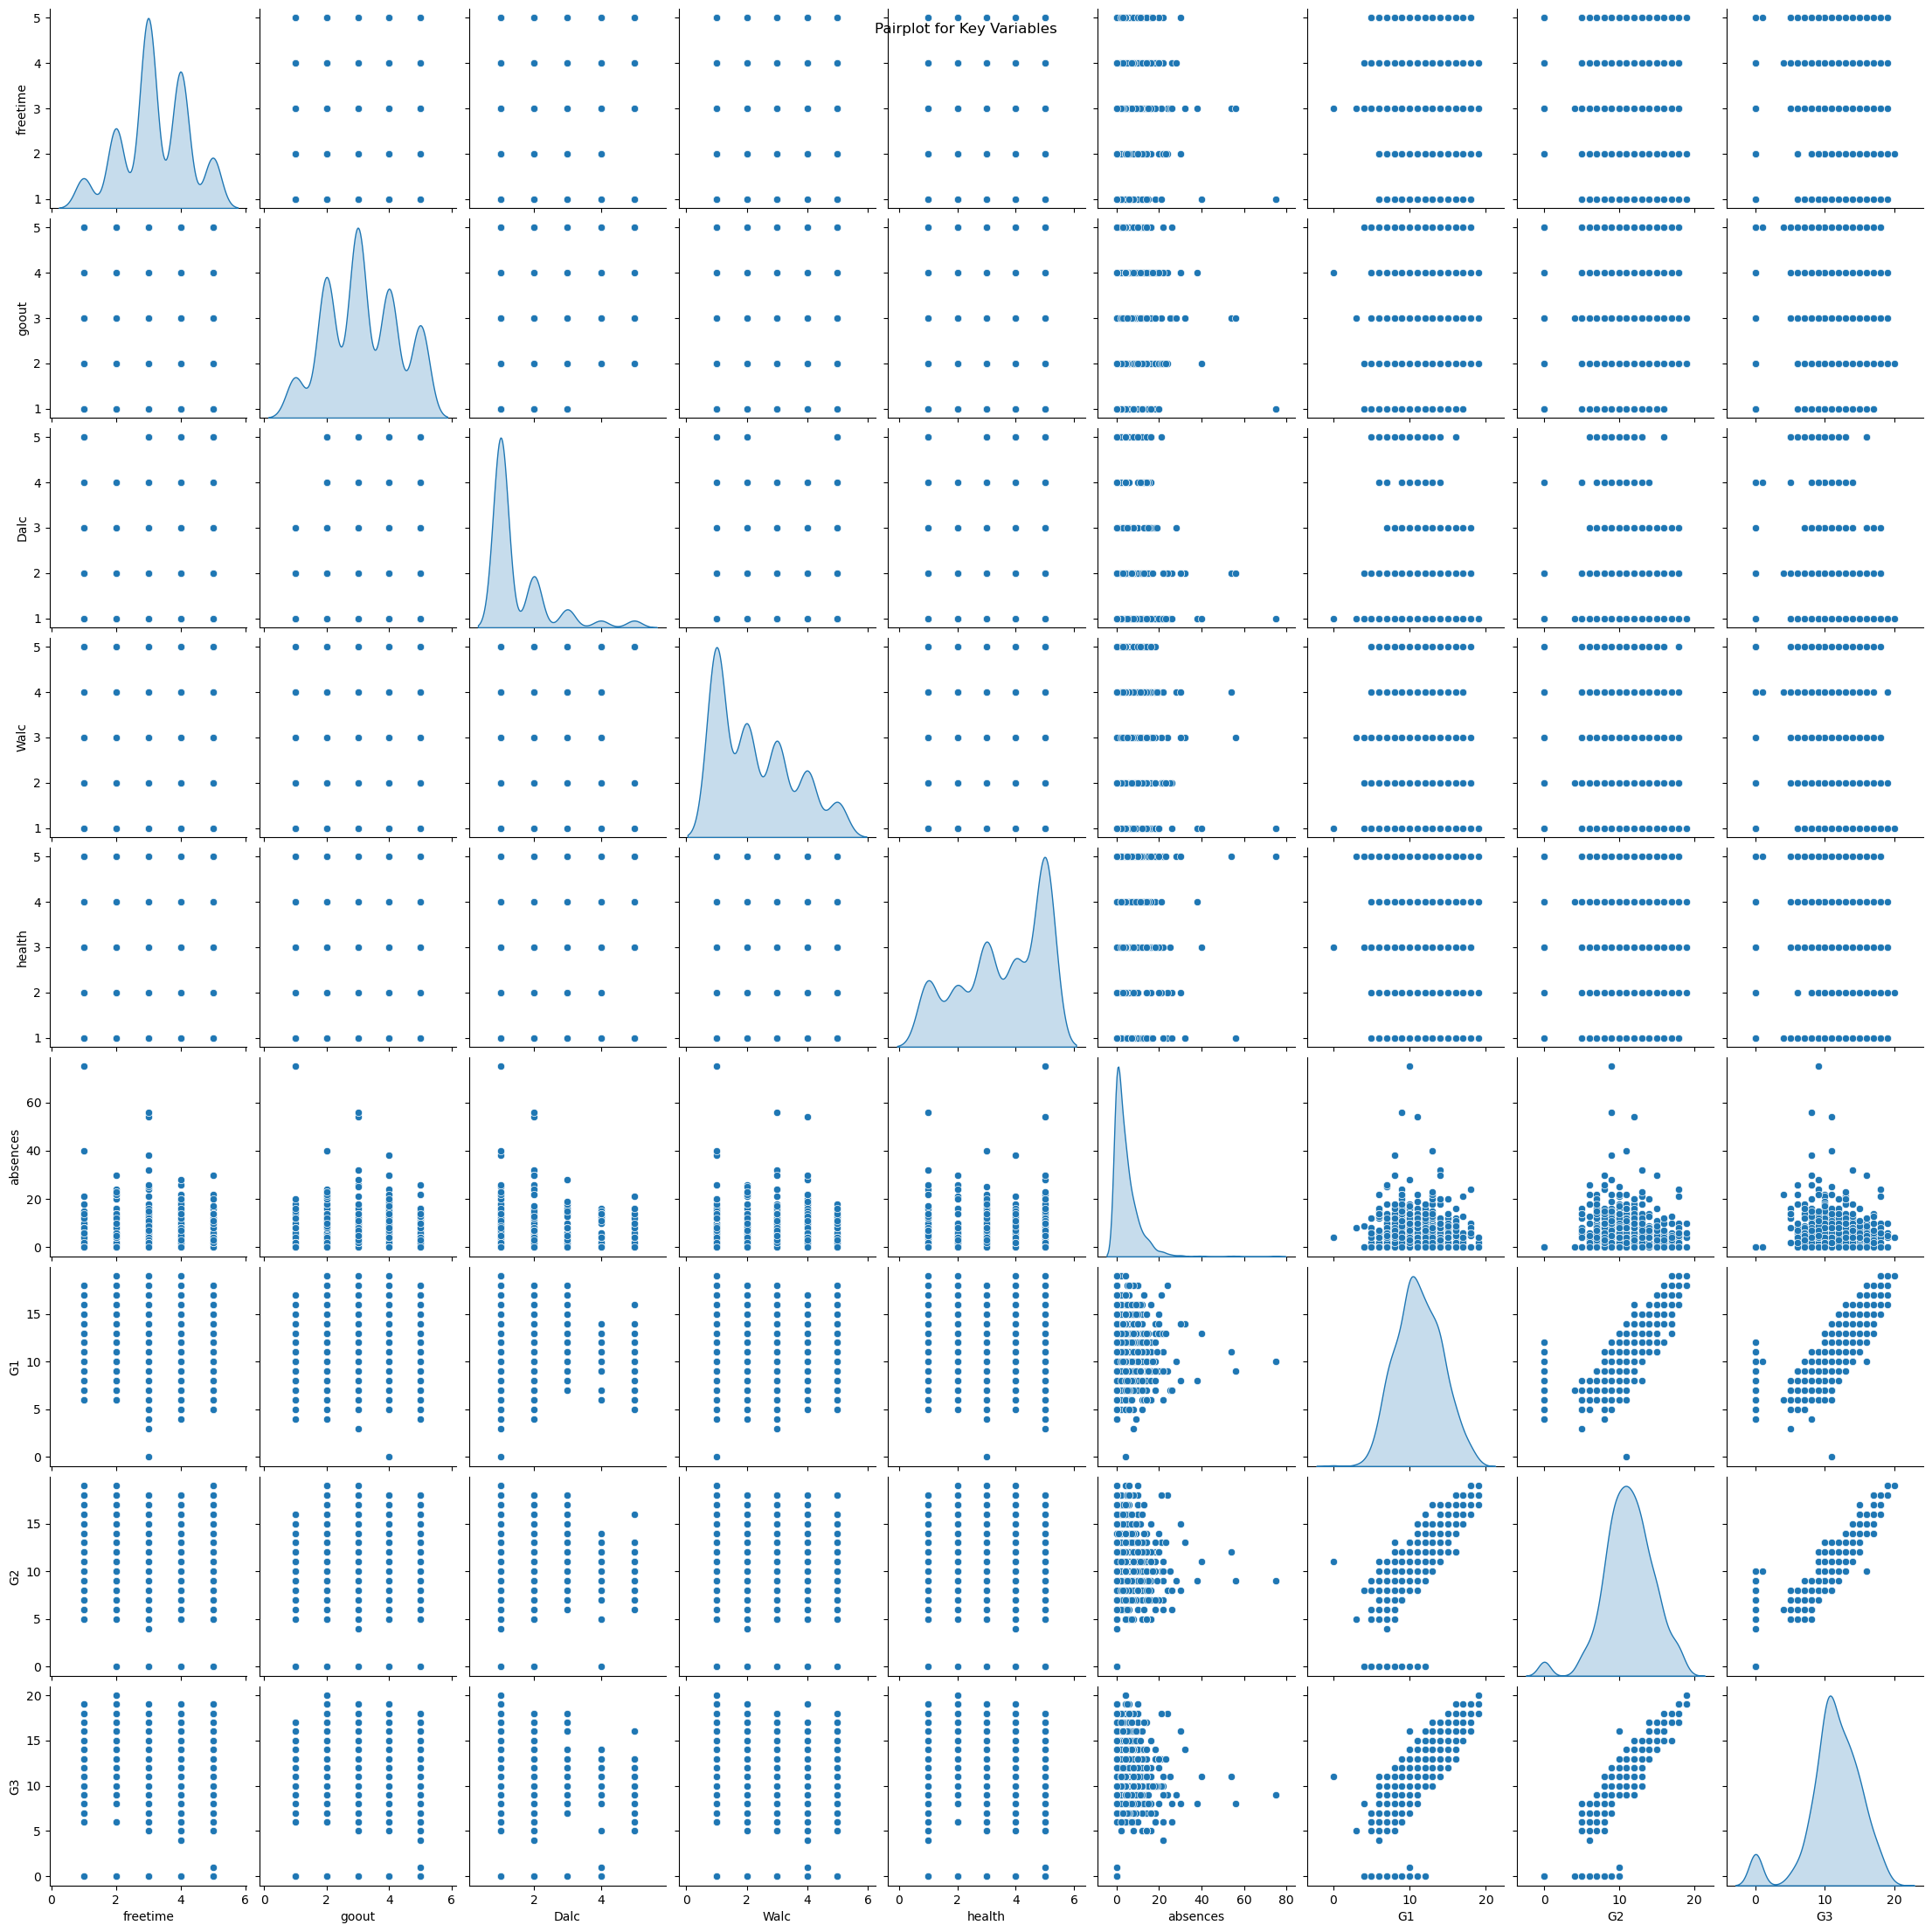

In [29]:
# Reset the index to default integer index
data.reset_index(drop=True, inplace=True)

sns.pairplot(data[['freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3']], diag_kind='kde')
plt.suptitle('Pairplot for Key Variables')
plt.show()

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

## Separate Features and target

In [34]:
X = data.drop(columns=['G3'])  # Drop the target column
Y = data['G3']  # Target column

## Encoding

In [32]:
# Convert categorical columns to numerical using one-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)

## Scaling

In [38]:
# Apply StandardScaler to the numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

## Feature Selection

In [40]:
from sklearn.decomposition import PCA

# Initialize PCA, you can specify the number of components or the amount of variance to retain
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_pca = pca.fit_transform(X_scaled)

# Check the amount of variance explained by each principal component
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by each component: {explained_variance}")


Explained variance by each component: [0.09236596 0.06316461 0.04965092 0.04601297 0.04172241 0.03824031
 0.03719502 0.03406381 0.03328934 0.03248448 0.03060314 0.02952061
 0.02832554 0.02753322 0.02562937 0.02418604 0.02283815 0.02279304
 0.02224331 0.02147231 0.02028507 0.01962497 0.01876325 0.01828669
 0.01760839 0.01695595 0.01675747 0.01574498 0.01538122 0.01462719
 0.01341891 0.01281191 0.0120431  0.01115288 0.01047244]


## Train-test Split

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_pca,Y,test_size=0.2, random_state=100)

## Importing regression models and evaluation metrics

In [42]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,r2_score

## Training and evaluating the models

In [43]:
# Define the regression models
models={'Linear Regression':LinearRegression(),
        'Ridge Regression':Ridge(),
        'Lasso Regression':Lasso(),
        'Decision Tree':DecisionTreeRegressor(),
        'Random Forest':RandomForestRegressor(),
        'Gradient Boosting':GradientBoostingRegressor()
}
# Loop through each model
for name,model in models.items():
    model.fit(X_train,Y_train)
    Y_train_pred=model.predict(X_train)
    Y_test_pred=model.predict(X_test)
    rmse_train=np.sqrt(mean_squared_error(Y_train,Y_train_pred))
    rmse_test=np.sqrt(mean_squared_error(Y_test,Y_test_pred))
    r2_train=r2_score(Y_train,Y_train_pred)
    r2_test=r2_score(Y_test,Y_test_pred)
    print(f'Model:{name}')
    print(f'RMSE_train:{rmse_train}')
    print(f'RMSE_test:{rmse_test}')
    print(f'r2_score_train:{r2_train}')
    print(f'r2_score_test:{r2_test}')
    print('*'*100)
        

Model:Linear Regression
RMSE_train:1.5734256830900926
RMSE_test:2.001418231004142
r2_score_train:0.8218824608142801
r2_score_test:0.7892915362837799
****************************************************************************************************
Model:Ridge Regression
RMSE_train:1.5734278594755597
RMSE_test:2.0018547406346476
r2_score_train:0.8218819680643574
r2_score_test:0.7891996151628108
****************************************************************************************************
Model:Lasso Regression
RMSE_train:2.6209823756466157
RMSE_test:3.1737380739172933
r2_score_train:0.5057548482152314
r2_score_test:0.4701554865760822
****************************************************************************************************
Model:Decision Tree
RMSE_train:0.0
RMSE_test:3.6490806340343056
r2_score_train:1.0
r2_score_test:0.29955635731299934
****************************************************************************************************
Model:Random Forest
RMSE_train:0

#### Linear Regression offers the best balance between training and testing performance, with an RMSE of 2.00 and an R² score of 0.79 on the test set. This indicates the model generalizes well without overfitting.

#### Gradient Boosting and Random Forest have lower RMSE and higher R² scores on the training set but do not perform as well on the test set, indicating they may be overfitting. In conclusion, Linear Regression is the best model based on the provided metrics.

## Cross-Validation

In [44]:
from sklearn.model_selection import cross_val_score
for name,model in models.items():
    scores=cross_val_score(model,X_train,Y_train,cv=5,scoring='r2')
    mean_r2_score=scores.mean()
    print(f'{name}:Mean r2 score={mean_r2_score:.4f}')

Linear Regression:Mean r2 score=0.8051
Ridge Regression:Mean r2 score=0.8052
Lasso Regression:Mean r2 score=0.4933
Decision Tree:Mean r2 score=0.1612
Random Forest:Mean r2 score=0.6014
Gradient Boosting:Mean r2 score=0.6664


#### Ridge Regression is performing well. Linear Regression does not have many hyperparameters, we can use Ridge regression for hyperparameter tuning to find the best regularization strength.

## Hyperparameter Tuning

In [60]:
from sklearn.model_selection import GridSearchCV

# Define the model
ridge = Ridge()

# Define the hyperparameters to tune
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]  # You can adjust the range based on your needs
}

# Setup the GridSearchCV with R² as the scoring metric
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2', cv=5, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, Y_train)

# Best parameters and model
best_model = grid_search.best_estimator_
best_alpha = grid_search.best_params_['alpha']
best_r2 = grid_search.best_score_

# Print the results
print(f"Best Hyperparameter (alpha): {best_alpha}")
print(f"Best R² Score: {best_r2}")


Best Hyperparameter (alpha): 10.0
Best R² Score: 0.8055144428302097


In [61]:
# Evaluate the best model on the test set
Y_pred = best_model.predict(X_test)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
r2 = r2_score(Y_test, Y_pred)

print(f"Test RMSE: {rmse}")
print(f"Test R² Score: {r2}")

Test RMSE: 2.0058899679344813
Test R² Score: 0.7883489192814713


## Save the model

In [63]:
# Save the best model to a file
import joblib
from joblib import dump
joblib_file = "best_ridge_regression_model.pkl"  
joblib.dump(best_model, joblib_file)

print(f"Best model saved to {joblib_file}")

Best model saved to best_ridge_regression_model.pkl


## Load the Model

In [64]:
from joblib import load
loaded_best_model = joblib.load("best_ridge_regression_model.pkl")